# Introducción a Python para IA.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Probabilidad y estadística

Cuando hablamos de estadísitica, inevitablemente debemos referirnos también a la probabilidad.

La probabilidad contiene un mundo de teorías, que pueden ser muy complicadas, pero que tienen aplicación en la vida real.

En el nivel más básico nos preguntamos: ¿Cuál es la probabilidad de que un evento suceda?

Para calcular esta probabilidad, es necesario considerar todos los demás eventos que también podrían ocurrir.

Dos ejemplos clásicos son el lanzamiento de una moneda o de un dado. En el primero pueden ocurrir solo dos eventos (en México decimos Águila o Sol), en el segundo pueden ocurrir seis.

Para calcular la probabilidad de que un evento ocurra, contamos las posibilidades de que realmente ocurra y dividimos el resultado entre el número total de posibilidades. De esta manera en el caso del lanzamiento de una moneda tenemos un $50\%$ de que ocurra uno de los eventos (la mitad Águila, la otra mitad Sol). En el caso del dado la probabilidad es de $16.6\%$ ($1/6$). 

Observando los eventos que pueden ocurrir, la probabilidad nos proporciona un sistema para realizar predicciones de qué tan frecuente un evento puede ocurrir.

Sin embargo, en la realidad puede pasar que cuando lances la moneda, en vez de obtener la mitad de Águila y la otra mitad de Sol, te encuentres con que la mayoría de las veces cae, por ejemplo Sol (y entonces pienses que la moneda está "cargada").

Pero, regularmente el número de lanzamientos no es lo suficientemente grande para poder hacer esta suposición (me están haciendo trampa); lo que debes hacer para evitar pensar mal, es lanzar muchas veces la moneda (10, 100, 1000, ...) y **¡empezar a recopilar datos!**; y luego usar la estadística para calcular las probabilidades con base en tus observaciones y checar que realmente se obtiene lo esperado (50-50, en el caso del lanzamiento de la moneda).

Veamos el siguiente ejemplo:

In [1]:
import random
import math

def lanzamiento(n):
    sol = 0
    aguila = 0
    for i in range(n):
        resultado = random.random()
        if resultado <= 0.5:
            sol += 1
        else:
            aguila +=1

    return aguila/n, sol/n

In [2]:
lanzamiento(10)

(0.6, 0.4)

Observa que el error con respecto del resultado ideal (50-50) se desvanece conforme aumentamos el número de lanzamientos. Podemos calcular una *desviación* con respecto del resultado esperado:

In [3]:
a, s = lanzamiento(1000)

print('Águila : {:.2f} ({:.2f}) \t Sol : {:.2f} ({:.2f})'.format(a, math.fabs(a-0.5), s, math.fabs(s-0.5)))

Águila : 0.50 (0.00) 	 Sol : 0.50 (0.00)


Entonces, la estadística nos permite calcular probabilidades a partir de observaciones del mundo real, siempre y cuando tengamos suficientes datos.

La probabilidad nos proporciona las teorías, mientras que la estadística nos provee de herramientas para probar esas teorías usando datos. 

Acabamos de mostrar lo anterior con el ejemplo del lanzamiento de una moneda, pero esto se puede aplicar a ejemplos que son mucho más complejos: 
* ¿Cuál es la probabilidad de que un meteorito caiga en el patio de mi casa? 
* ¿Cuál es la probabilidad de que me saque la lotería? 
* ¿Cuál es la probabilidad de que mi equipo favorito sea campeón? 

No es fácil responder a estas preguntas, a menos que tengamos mucha información, datos duros, para calcular estadísticas. Y entre más datos tengamos, nuestra confianza en esos cálculos será mayor.

# Variables aleatorias.

Pero antes de comenzar a realizar cálculos estadísticos, tenemos que revisar ¿cuál es la naturaleza de nuestros datos?

Nos referimos en este punto a las [**variables aleatorias**](https://es.wikipedia.org/wiki/Variable_aleatoria) como funciones que asignan un valor, usualmente numérico, al resultado de un experimento aleatorio.

## Variable aleatoria discreta. 

Es aquella que solo toma ciertos valores (frecuentemente enteros) y que resulta principalmente del conteo realizado.  Una variable aleatoria discreta $X$ está definida por los valores que toma y sus probabilidades, las cuales deberán sumar 1.

| $X$   | $P(X=x_i)$ |
|-------|:----------:|
|$x_1$  | $p_1$ |
|$x_2$  | $p_2$ |
|$\dots$| $\dots$ |
|$x_n$  | $p_n$ |

Se debe verificar que $\sum_i p_i = 1$.

**Ejemplo 1**. El experimento de lanzar dos monedas tiene los siguientes resultados (espacio muestral): 

$$
\Omega = \{ \text{(Águila, Águila), (Águila, Sol), (Sol, Sol), (Sol, Águila)} \}
$$

Definimos la variable aleatoria $X$ cómo el número de veces que cae $\text{Águila}$. Podemos escribir $X: \Omega \rightarrow R_X$ tal que:

$$
\begin{array}{ccccc}
 \text{(Águila, Águila)} & \text{(Águila, Sol)} & \text{(Sol, Sol)} & \text{(Sol, Águila)} \\
\downarrow & \downarrow & \downarrow & \downarrow \\
 2 & 1 & 0 & 1 
\end{array}
$$

Entonces, nuestra distribución de probabilidades es:

| $X$   | $P(X=x_i)$ |
|-------|:-----------:|
|$0$  | $0.25$ |
|$1$  | $0.50$ |
|$2$  | $0.25$ |

La [**función de probabilidad**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad)  (también llamada función de masa de probabilidad o **pmf** por sus siglas en inglés), proporciona la probabilidad de que una variable aleatoria discreta sea exactamente igual a algún valor. La función de probabilidad suele ser el medio principal para definir una distribución de probabilidad discreta, y tales funciones existen para variables aleatorias escalares o multivariantes, cuyo dominio es discreto.

## Variable aleatoria continua. 

Es aquella que resulta generalmente de la medición y puede tomar cualquier valor dentro de un intervalo dado. Este tipo de variables están caracterizadas por una [**función de densidad de probabilidad**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad), que es una generalización de la distribución de probabilidad del caso discreto.

**Ejemplo 2.**
Considera el siguiente experimento: si nos paramos en una avenida y preguntamos a las personas su estatura, obtendremos resultados dentro de un intervalo bien definido $[e_{min}, e_{max}]$. El valor de esta variable puede ser cualquiera dentro de este intervalo (no es fácil contarlo). Tenemos entonces una variable aleatoria continua.


# Población, espacio muestral y sesgo.

La mayoría de los resultados en estadística que se obtienen de una [**población**](https://es.wikipedia.org/wiki/Poblaci%C3%B3n_estad%C3%ADstica) general, se extraen a partir del estudio de una [**muestra**](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica) de esta población. 

Una muestra es un subconjunto de casos o individuos de una población. Es importante que la muestra sea representativa, pues
si la muestra está **sesgada** tendrá poco interés y su utilidad será limitada. El [**sesgo**](https://es.wikipedia.org/wiki/Sesgo) es un peso desproporcionado a favor o en contra de una cosa, persona o grupo en comparación con otra, generalmente de una manera que se considera injusta. Muchas veces los sesgos provienen de contextos culturales. 

# Estadística inferencial.
Por ejemplo, si deseamos calcular la estatura promedio de todas las personas del mundo, sería muy complicado obtener la información de todas y cada una de las personas que habitan este planeta. Para obtener una estimación de dicho promedio podemos hacer uso de la **estadística inferencial**, pues nos permite obtener conclusiones de una gran cantidad de datos a partir de una muestra, es decir un pequeño conjunto de datos bien elegido y sin sesgos. 

La muestra debe ser elegida adecuadamente, de forma aleatoria y sin sesgos, para ello existen diferentes [**técnicas de muestreo**](https://es.wikipedia.org/wiki/Muestreo_(estad%C3%ADstica)) que pueden ser utilizadas.

Con la muestra podemos calcular la media, la moda, la desviación estándar, etc. En este caso se les agrega el adjetivo *muestral*; por ejemplo la media de la muestra, es la **media muestral** y a apartir de este valor se puede inferir la media  de toda la población. Esto por supuesto genera errores, debido a que los cálculos se hacen sobre la muestra, pero podría ser pequeño si el muestreo fue adecuado, por lo que la media muestral puede ser representativa de toda la población.

Podemos por ejemplo, obtener muestras de diferentes países o continentes, obtener la media y verificar si son diferentes. Esto se conoce como [**pruebas de hipótesis**](https://es.wikipedia.org/wiki/Contraste_de_hip%C3%B3tesis).

# Distribuciones de probabilidad.

El proceso de determinar resultados, esto es, llegar a ciertas conclusiones a través de la estadística, a partir de una muestra no sesgada de la población general, se conoce como [**inferencia estadística**](https://es.wikipedia.org/wiki/Estad%C3%ADstica_inferencial). Las inferencias se basan con frecuencia en hacer suposiciones acerca de la forma en que los datos se distribuyen. A estas formas de distribución se les conoce como [**distribuciones de probabilidad**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de una variable aleatoria, y es una función que asigna a cada suceso definido sobre la variable, la probabilidad de que dicho suceso ocurra. 

## Distribución normal

Existen muchas variables del mundo real que se ajustan a una [**distribución normal**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal). Una de las características principales de esta distribución es que los datos más frecuentes se van a encontrar muy cerca de la media. Lejos de la media se tiene una menor cantidad de datos. La fórmula matemática es:

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} 
$$

La distribución normal se asocia a variables aleatorias continuas. 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

Media 0.00000, Mediana -0.00241


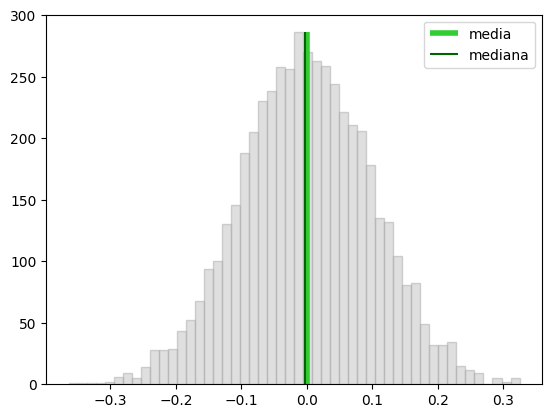

In [10]:
mu, sigma =  0, 0.1
s = np.random.normal(mu, sigma, 5000)
me = np.median(s)

print('Media {:.5f}, Mediana {:.5f}'.format(mu, me))

c, bins, _ = plt.hist(s, 50, fc='silver', ec='darkgrey', alpha=0.5)#, density=True)

plt.vlines(mu, 0, max(c), color='limegreen', label='media', lw=4, ls='-')
plt.vlines(me, 0, max(c), color='darkgreen', label='mediana')
plt.legend()

plt.show()

## Función de densidad de probabilidad (PDF)

En la teoría de la probabilidad, la [**función de densidad de probabilidad**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) (PDF por sus siglas en inglés), también conocida como función de densidad o simplemente densidad, de una variable aleatoria continua, describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor.

La probabilidad de que la variable aleatoria caiga en una región específica del espacio de posibilidades estará dada por la integral de la densidad de esta variable entre uno y otro límite de dicha región.

Una variable aleatoria $X$ tiene función de densidad $f_{X}(x)$, siendo $f_{X}(x))$ una función no-negativa integrable de Lebesgue, si se cumple:

$$
P[a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx
$$

Intuitivamente, puede considerarse $f_{X}(x)dx$ como la probabilidad de $X$ de caer en el intervalo infinitesimal $[x,x+dx]$.

---
### **<font color="DodgerBlue">Ejercicio 1.</font>**

<font color="DarkBlue"> 
Usando la distribución normal, calcula la probabilidad de que una variable aleatoria obtenga valores entre la media y la desviación estándar. Utilica expresiones de `sympy`.
</font>

---

$$
P[\mu \leq X\leq \sigma]=\int _{\mu}^{\sigma}\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \,dx
$$


In [18]:
### BEGIN SOLUTION
import sympy

x = sympy.symbols('x')

mu = 0.0
sigma = 0.1

normal = (2*sympy.pi*sigma**2) ** sympy.Rational(-1, 2) * sympy.exp(-(x-mu)**2/(2*sigma**2))

display(normal)

sym.integrate(normal, (x, mu, sigma))
### END SOLUTION

7.07106781186547*exp(-50.0*x**2)/sqrt(pi)

0.341344746068543

El resultado es de 34%. Si hacemos lo mismo para hacia la izquierda de la media tenemos otro 34%.

---
### **<font color="DodgerBlue">Ejercicio 2.</font>**

<font color="DarkBlue"> 
Usando la distribución normal, calcula la probabilidad de que una variable aleatoria obtenga valores en los siguientes intervalos: $[\sigma, 2\sigma]$ y $[2\sigma, 3\sigma]$.
</font>

---


In [19]:
### BEGIN SOLUTION
display( sym.integrate(normal, (x, sigma, 2*sigma)) )
display( sym.integrate(normal, (x, 2*sigma, 3*sigma)) )
### END SOLUTION

0.135905121983278

0.0214002339165491

Podemos graficar la distribución normal como sigue:

In [20]:
def normal(bins, sigma, mu):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

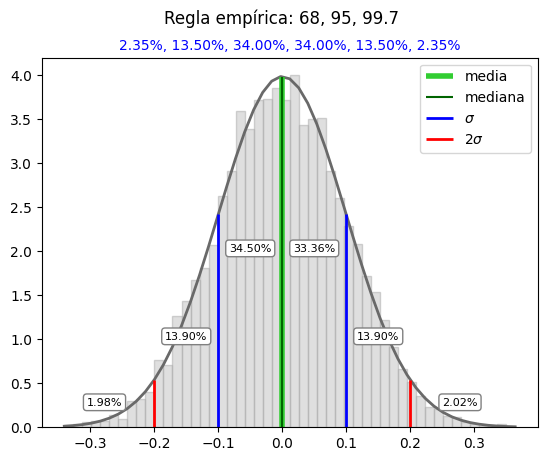

In [21]:
mu, sigma =  0, 0.1
n = 5000
s = np.random.normal(mu, sigma, n)
me = statistics.median(s)

p1l = np.where(((mu - sigma) < s) & (s < 0), 1, 0).sum()*100/n
p1r = np.where(((mu + sigma) > s) & (s > 0), 1, 0).sum()*100/n

p2l = np.where(((mu - 2*sigma) < s) & (s < (mu - sigma)), 1, 0).sum()*100/n
p2r = np.where(((mu + 2*sigma) > s) & (s > (mu + sigma)), 1, 0).sum()*100/n

p3l = np.where(((mu - 3*sigma) < s) & (s < (mu - 2*sigma)), 1, 0).sum()*100/n
p3r = np.where(((mu + 3*sigma) > s) & (s > (mu + 2*sigma)), 1, 0).sum()*100/n

c, bins, _ = plt.hist(s, 50, fc='silver', ec='darkgrey', alpha=0.5, density=True)

p = normal(bins, sigma, mu)

plt.plot(bins, p, linewidth=2, color='dimgrey')
plt.vlines(mu, 0, max(p), color='limegreen', label='media', lw=4, ls='-')
plt.vlines(me, 0, max(p), color='darkgreen', label='mediana')
plt.vlines([-sigma, sigma], 0, normal(sigma, sigma, mu), color='blue', lw=2, label='$\sigma$')
plt.vlines([-2*sigma, 2*sigma], 0, normal(2*sigma, sigma, mu), color='red', lw=2, label='$2 \sigma$')

plt.text(-0.05,2.0, '{:.2f}%'.format(p1l), fontsize=8, ha='center', 
         bbox=dict(boxstyle="round", ec='gray', fc='w',))
plt.text(+0.05,2.0, '{:.2f}%'.format(p1r), fontsize=8, ha='center', 
         bbox=dict(boxstyle="round", ec='gray', fc='w',))

plt.text(-0.15,1.0, '{:.2f}%'.format(p2l), fontsize=8, ha='center', 
         bbox=dict(boxstyle="round", ec='gray', fc='w',))
plt.text(+0.15,1.0, '{:.2f}%'.format(p2r), fontsize=8, ha='center', 
         bbox=dict(boxstyle="round", ec='gray', fc='w',))

plt.text(-0.25,0.25, '{:.2f}%'.format(p3l), fontsize=8, ha='right', 
         bbox=dict(boxstyle="round", ec='gray', fc='w',))
plt.text(+0.25,0.25, '{:.2f}%'.format(p3r), fontsize=8, ha='left', 
         bbox=dict(boxstyle="round", ec='gray', fc='w',))

plt.suptitle('Regla empírica: 68, 95, 99.7')
plt.title('2.35%, 13.50%, 34.00%, 34.00%, 13.50%, 2.35%', c='b', fontsize=10)
plt.legend()

plt.show()

* El área bajo la curva de la función de densidad es uno, ya que la probabilidad total debe ser del 100%.
* El resultado de la función de probabilidad es siempre positivo, ya que no existen probabilidades negativas.


En este punto introducimos la [**función de distribución acumulada**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) (CDF por sus siglas en inglés), que se expresa como la integral de la función de densidad de probabilidad, $f_X$, para una variable discreta continua $X$:

$$
F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt
$$


## Usando Scipy para calcular distribuciones.
El módulo `stats` de la biblioteca `scipy` ofrece varias herramientas para trabajar con distribuciones. Se tienen definidad las siguientes distribuciones:

* `scipy.stats.norm`: [**Distribución normal**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).
* `scipy.stats.binom`: [**Distribución binomial**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial).
* `scipy.stats.geom`: [**Distribución geométrica**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica).
* `scipy.stats.logistic`: [**Distribución logística**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log%C3%ADstica).
* `scipy.stats.expon`: [**Distribución exponencial**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial).
* `scipy.stats.uniform`: [**Distribución uniforme**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme).
* `scipy.stats.poisson`: [**Distribución de Poisson**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson).

Para la distribución normal (`scipy.stats.norm`) se tienen definidos los siguientes métodos:

* `pdf(x, loc=0, scale=1)` : Función de densidad $f_{X}(x)$ (distribuciones continuas).
* `cdf(x, loc=0, scale=1)` : Función de distribución (acumulada) $F_{X}(x)$.
* `sf(x)` = `1 - cdf(x)` 
* `ppf(q, loc=0, scale=1)` : Función inversa a `cdf(x)`. Nos permite obtener el valor correspondiente a una probabilidad. Por ejemplo, ` ppf(0.01)` nos da el valor de la variable aleatoria que corresponde con el $1$%.
* `rvs(loc=0, scale=1, size=1)` : General las variables aleatorias de un tipo específico.

Los parámetros que usan estas funciones son:

- `x` Especifica un flotante o un arreglo de flotantes que representan a la variable aleatoria.
- `q` Especifica un flotante o un arreglo de flotantes que representan a las probabilidades.
- `loc` Especifica la media de la distribución, por omisión es igual a $0.0$. (Opcional).
- `scale` Especifica la desviación estándar de la distribución; debe ser positiva; por omisión es igual a $1.0$.  (Opcional).
- `size` Especifica la forma de la salida (shape). (Opcional).

---
### **<font color="DodgerBlue">Ejercicio 3.</font>**

<font color="DarkBlue"> 
La duración de un determinado componente electrónico, en horas, es una variable aleatoria continua que se distribuye según una distribución normal, con una media de $2000$ y una desviación estándar de $40$. Grafique la distribución normal usando scipy.
</font>

Ls función `pdf`


---

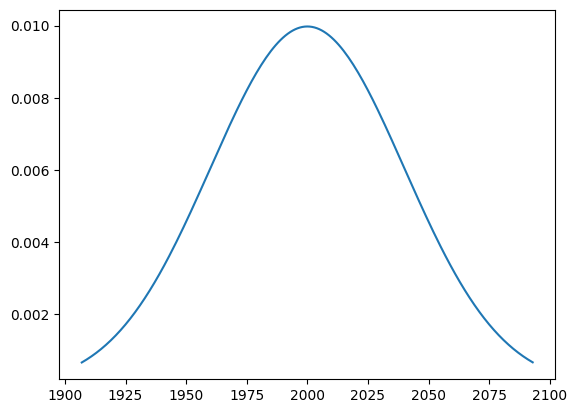

In [209]:
media = 2000
sigma = 40

X = scipy.stats.norm(loc = media, scale = sigma)          # Distribución normal
x = np.arange(X.ppf(0.01),X.ppf(0.99)) # del 1 al 99 %
y = X.pdf(x) # Construcción de la función de densidad de probabilidad

plt.plot(x, y)
plt.show()

---
### **<font color="DodgerBlue">Ejercicio 4.</font>**

<font color="DarkBlue"> 
Usando la disrtribución del ejercicio 3 responda lo siguiente: ¿Cuál es la probabilidad de que la duración de una de esas componentes sea superior a 1900 horas? ¿y de que esté entre 1850 y 1950 horas?
</font>

---



In [210]:
print(X.sf(1900))
print(X.cdf(1950) - X.cdf(1850)) 

0.9937903346742238
0.10556135638165455


### Otras funciones

2000


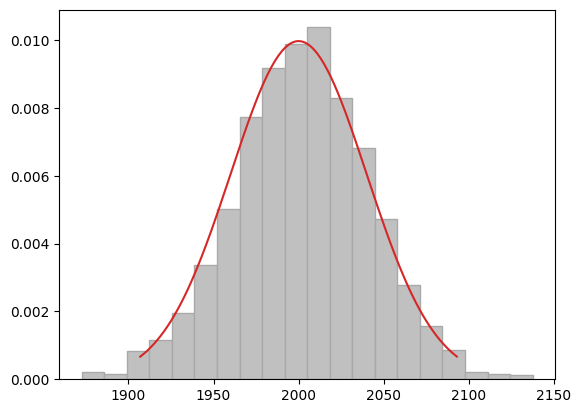

In [212]:
yd = X.rvs(media, sigma) # Datos aleatorios discretos con una distribución normal.

plt.hist(yd, bins=20, fc='silver', ec='darkgrey',density=True) 
plt.plot(x, y, c='C3')
plt.show()

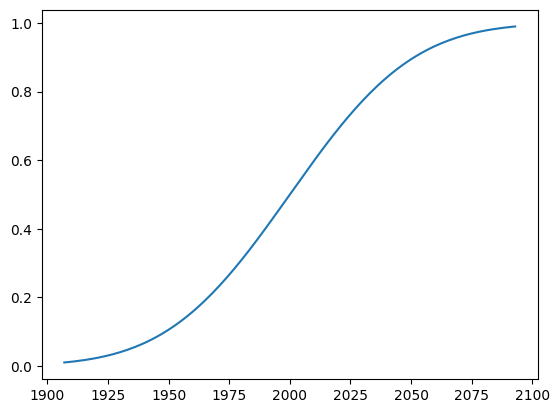

In [108]:
ycdf = X.cdf(x) # Función de distribución acumulada

plt.plot(x, ycdf) 
plt.show()

## Distribución binomial.

La [**distribución binomial**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) (eventos independientes) está definida para variables aleatorias discretas. Particularmente para la probabilidad de que un evento sea exitoso en donde solo se tienen dos posibilidades. 

$$
P(k,n,p) =  \binom{n}{k} p^k q^{n-k} = \frac{n!}{k!(n-k)!}p^k q^{n-k}
$$
donde $n$ es el número de eventos, $k \in [0, 1, \dots, n]$ el número de éxitos en los $n$ eventos, $0 \leq p \leq 1$ probabilidad de éxito de un evento individual, $q = 1 - p$ probabilidad de falla. 

En la fórmula anterior aparece el coeficiente binomial que proporciona el número de formas en que se puede extraer muestras (subconjuntos) de un conjunto dado. Tenemos entonces que el número de formas de escoger $k$ elementos a partir de un conjunto de $n$, está dado por la fórmula:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

Para la distribución binomial (`scipy.stats.binom`) se tienen definidos métodos similares a los de la normal, pero con diferentes parámetros:

* `pmf(k, n, p, loc=0)` : Función de densidad $f_{X}(x)$ (distribuciones continuas).
* `cdf(k, n, p, loc=0)` : Función de distribución (acumulada) $F_{X}(x)$.
* `ppf(q, n, p, loc=0)` : Función inversa a `cdf(x)`. Nos permite obtener el valor correspondiente a una probabilidad. Por ejemplo, ` ppf(0.01)` nos da el valor de la variable aleatoria que corresponde con el $1$%.
* `rvs(n, p, loc=0, size=1)` : General las variables aleatorias de un tipo específico.

Los parámetros que usan estas funciones son:

- `k` Especifica un flotante o un arreglo de flotantes que representan a la variable aleatoria.
- `q` Especifica un flotante o un arreglo de flotantes que representan a las probabilidades.
- `n` Especifica el número de eventos, debe ser mayor que $0$.
- `q` Especifica la probabilidad de éxito de cada evento, debe estar en el intervalo $[0,1]$. Puede ser un flotante o un arreglo.
- `loc` Especifica la ubicación de la distribución, por omisión es igual a $0.0$. (Opcional).
- `size` Especifica la forma de la salida (shape). (Opcional).

---
### **<font color="DodgerBlue">Ejercicio 5.</font>**

<font color="DarkBlue"> 
La probabilidad de que un test específico sea aprobado por una persona es del $20$%. ¿Cuál es la probabilidad de que de 5 personas seleccionadas al azar, 3 de ellas aprueben el test?
</font>

---

**Solución**.

$$
P(k=3, n=5, p=0.5) = \binom{5}{3} 0.2^3 0.8^{5-3} = \frac{5!}{3!(5-3)!}0.2^3 0.8^{5-3} = 0.05
$$



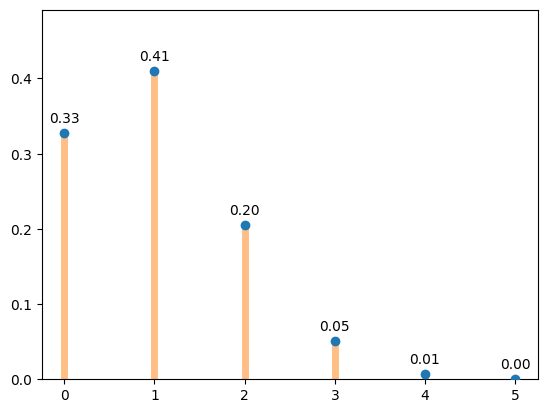

In [119]:
p = 0.2
n = 5

x = np.arange(0, n+1, 1)
y = scipy.stats.binom.pmf(k = x, n = n, p = p) # Calcula la función de distribución de masa binomial (pmf)
   
plt.scatter(x, y, zorder=5)
plt.vlines(x, 0, y, colors='C1', lw=5, alpha=0.5)
plt.xticks(x)
plt.ylim(0, max(y)*1.2)

for xi, yi in zip(x, y):
    plt.text(xi, yi+0.01, '{:.2f}'.format(yi), ha='center', va='bottom')
    
plt.show()

Para el caso de las distribuciones de probabilidades discretas, la [**función de distribución acumulada (cdf)**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) se basa en sumas. Para la distribución binomial tenemos:

$$
F(k; n,p) =  P(X \leq k) = \sum_{i=0}^{[k]} \binom{n}{i} p^i q^{n-i} = \frac{n!}{i!(n-i)!}p^i q^{n-i}
$$

donde $[k]$ es el entero más grande menor o igual a $k$. Cuando $F$ se evalúa en $k$ obtenemos la probabilidad de que la variable aleatoria $X$ tome un valor menor o igual a $k$.

---
### **<font color="DodgerBlue">Ejercicio 6.</font>**

<font color="DarkBlue"> 
Calcular y graficar la <b>cdf</b> para la distribución del ejemplo 5.
</font>

---

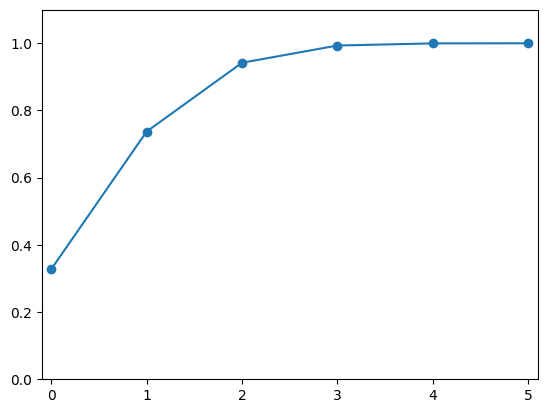

In [133]:
n = 5
p = 0.2
x = np.arange(0, n+1, 1)
y = scipy.stats.binom.cdf(x, n, p)
plt.plot(x, y, 'o-') 
plt.ylim(0,1.1)
plt.xlim(-0.1,5.1)
plt.xticks(x)

plt.show()

## Estimación de densidad de kernel (KDE)

Supon que tenemos un conjunto de datos representados mediante un histograma como el siguiente:

In [142]:
import pandas as pd
datos = pd.read_csv('../utils/data/gpa_iq.csv')
datos

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58
...,...,...,...,...,...
73,85,9.000,112,1,60
74,86,9.500,112,1,70
75,87,6.057,114,2,51
76,88,6.057,93,1,21


Usamos la columna `iq` para generar un histograma:

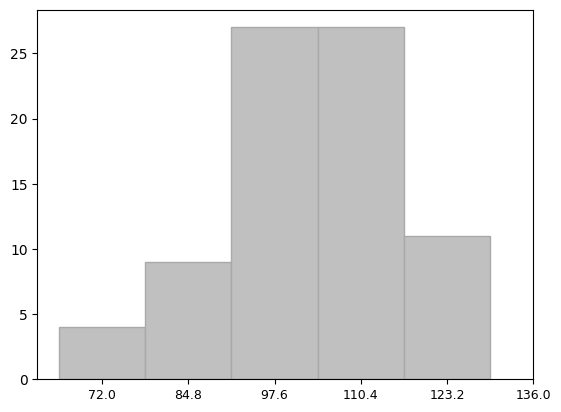

In [204]:
counts, bins, _ = plt.hist(datos.iq, bins=5, fc='silver', ec='darkgrey', align='left')
plt.xticks(bins, fontsize=9)
plt.show()

Es posible crear una versión suavizada de el histograma anterior mediante lo que se conoce como [**KDE**](https://en.wikipedia.org/wiki/Kernel_density_estimation) (Kernel Density Estimation). Esta KDE nos permite estimar la PDF a partir de nuestro conjunto de datos.

En ese ejemplo se tienen 6 puntos. Para construir el KDE se colocan kernels de tipo Gausiano (normal), que se indican con las líneas rojas, sobre cada uno de los datos (ticks negros). Se suman todos los kernesl para crear una estimación de la función de densidad de probabilidad. 

<a title="Drleft at English Wikipedia, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png"><img alt="Comparison of 1D histogram and KDE" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/512px-Comparison_of_1D_histogram_and_KDE.png"></a>

La definición formal de KDE es como sigue: sean $(x_1, x_2, \dots, x_n)$ muestras independiente con una función de densidad $f$ desconocida. Para estimar la forma de la $f$ usamos lo siguiente: 

$$
{\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )}
$$

donde $K$ es el kernel, una función no negativa y $h>0$. El parámetro $h$ se conoce como el ancho de banda (*bandwith*). Existen varias metodologías para elegir este parámetro de forma óptima.

Con los datos que tenemos, podemos construir un KDE fácilmente usando `seaborn` como sigue:

<Axes: xlabel='iq', ylabel='Density'>

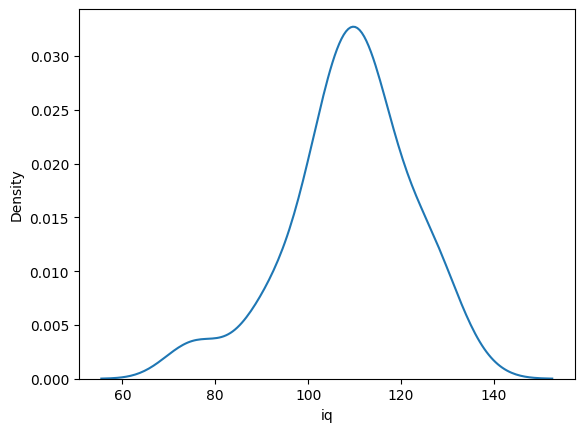

In [263]:
import seaborn as sns
sns.kdeplot(datos.iq)

<Axes: xlabel='iq', ylabel='Density'>

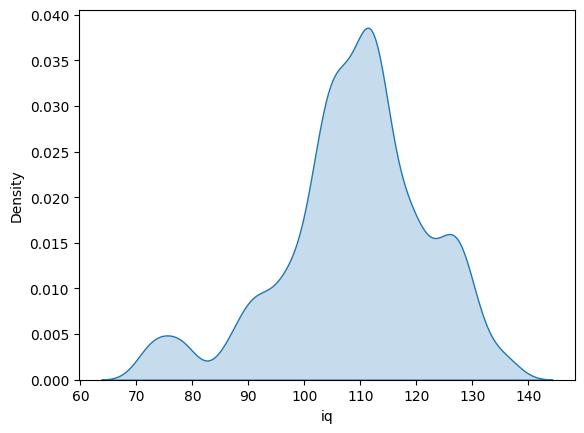

In [272]:
sns.kdeplot(datos.iq, fill=True, bw_adjust=0.5) # Moviendo el bandwidth

<Axes: xlabel='iq', ylabel='Density'>

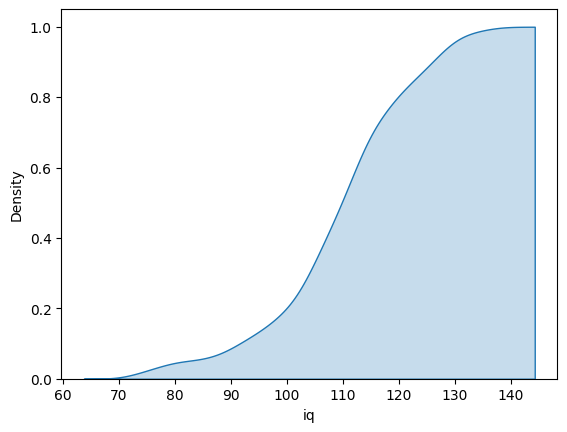

In [284]:
# CDF
sns.kdeplot(datos.iq, fill=True, bw_adjust=0.5, cumulative=True) # Moviendo el bandwidth

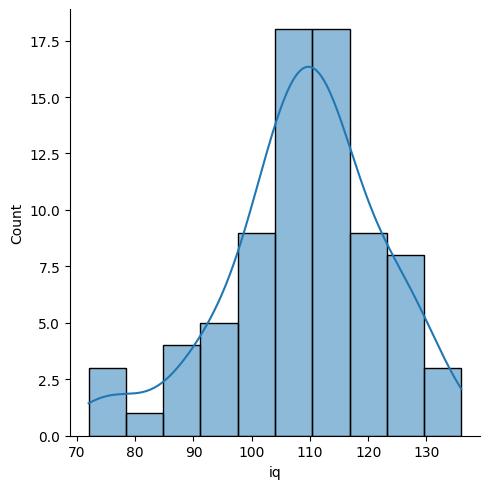

In [260]:
sns.displot(datos.iq, kde=True)

<Axes: ylabel='Density'>

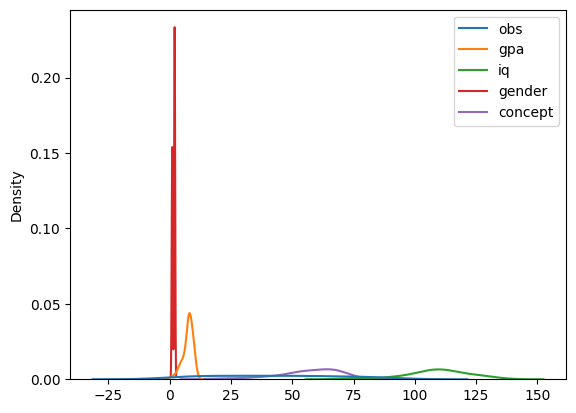

In [300]:
sns.kdeplot(datos)

<Axes: ylabel='Density'>

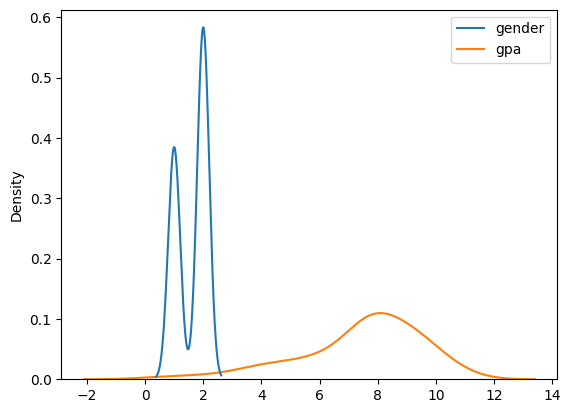

In [303]:
sns.kdeplot([datos.gender, datos.gpa])

<Axes: xlabel='iq', ylabel='concept'>

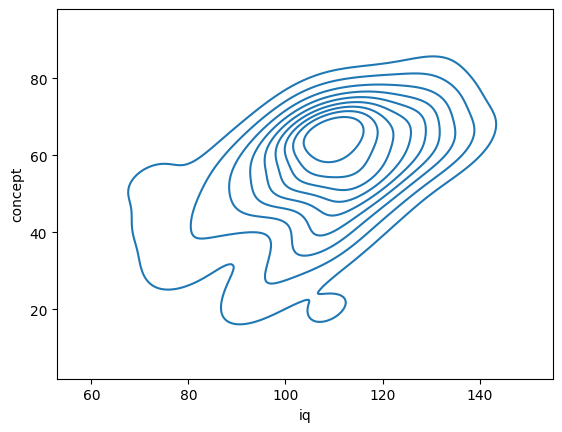

In [292]:
sns.kdeplot(datos, x= "iq", y = "concept")

<Axes: xlabel='iq', ylabel='concept'>

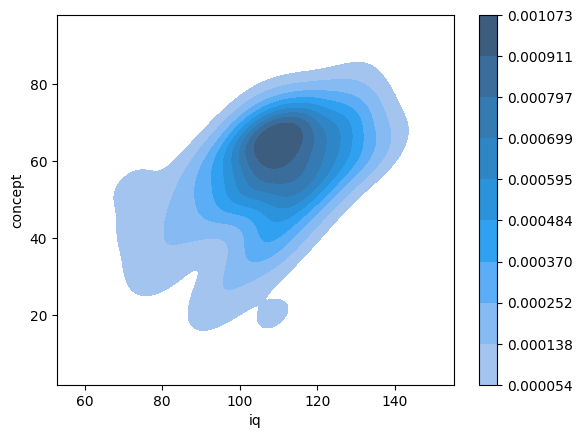

In [291]:
sns.kdeplot(datos, x= "iq", y = "concept", fill=True, cbar=True)

In [ ]:
sns.kdeplot(datos, x= "iq", y = "concept", )

## Otras posibles distribuciones.

* Variable aleatoria discreta (enteros):
    - [Distribución de Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) (eventos independientes).
    - [Distribución hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) (eventos dependientes).

* Variable aleatoria continua (números reales):
    - [Distribución de Cauchy](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Cauchy).
    - [Distribución exponencial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial).

# Teorema de Límite Central

<blockquote>
Independientemente de la forma de la población, la forma de la distribución muestral de la media se aproxima a una curva normal,  si el tamaño de la muestra es lo suficientemente grande.

[**Statistics**](https://books.google.com.mx/books?id=KcxjDwAAQBAJ), Witte, R.S., Witte, J.S., ISBN 9781119254515, 2017, Wiley.
</blockquote>


Para ejemplificar usaremos una población generada aleatoriamente y sesgada.

In [277]:
def data_set(sesgo, tam):
    datos_aleatorios = scipy.stats.skewnorm.rvs(sesgo, size=tam, random_state=1)
    return datos_aleatorios

In [278]:
data1 = data_set(sesgo = 10, tam = 10000)
print(data1.size, data1.max(), data1.min())

10000 4.062972250547014 -0.3048247108259654


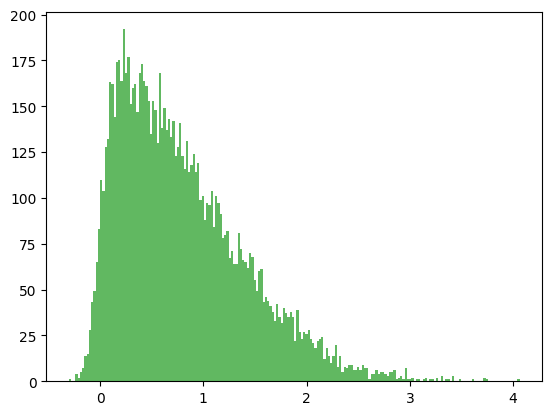

In [279]:
# Modifica el valor de bins= 5, 10, 20, 100, 200
plt.hist(data1, bins=200, alpha=0.75, fc='C2')
plt.show()

Observamos una distribución sesgada hacia la izquierda.

Ahora tomemos una muestra de la población, digamos de 30 y calculemos el promedio y lo graficamos.

In [280]:
np.random.choice(data1, 30)

array([ 0.55915818,  1.140238  , -0.03497918,  0.33366871,  0.2565735 ,
        0.01940617,  0.49736972,  0.52164014,  1.43993795,  0.33049009,
        0.29980321,  0.33163463,  1.69052892,  0.35697754,  1.41249953,
        0.42639941,  1.24062071,  0.39975393,  1.01700113,  0.36806959,
        1.24144971,  1.89937546,  0.84513714,  1.46943459,  1.35860412,
        0.34752998,  0.40950875,  1.12528617,  0.11004521,  0.97244899])

0.7063195628520235


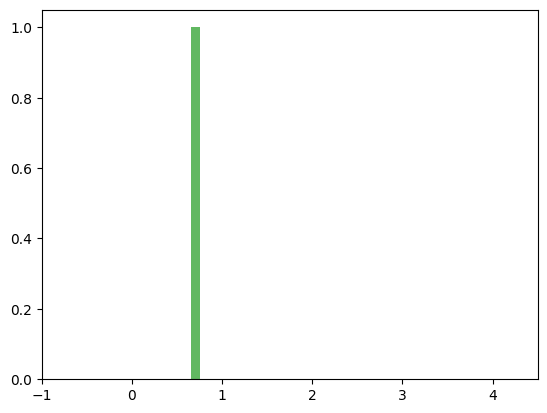

In [281]:
media = np.random.choice(data1, 30).mean()
print(media)

# Modifica el valor de bins= 5, 10, 20, 100, 200
plt.hist(media, bins=1, alpha=0.75, fc='C2', rwidth=0.1)
plt.xlim(-1, 4.5)
plt.show()

Repetimos el proceso varias veces para varias muestras:

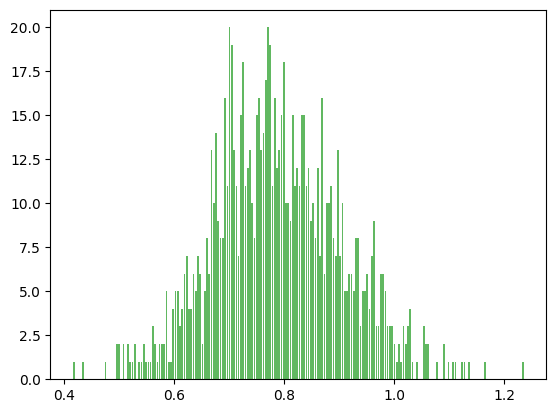

In [282]:
num_muestras = 1000
tam_muestra = 30
promedio = np.array([])
for i in range(num_muestras):
    media = np.random.choice(data1, tam_muestra).mean()
    promedio = np.append(promedio, media)

plt.hist(promedio, bins=200, alpha=0.75, fc='C2', rwidth=0.75)
plt.show()

Observa que entre más muestras tomemos, obtendremos una distribución normal.

Dado lo anterior, podemos aprovechar las técnicas estadísticas que asumen una distribución normal. 

# Intervalo de confianza

Cuando trabajamos con muestras generalmente se introduce un error en los cálculos estadísticos. Para estimar este error podemos hacer uso del [**intervalo de confianza**](https://es.wikipedia.org/wiki/Intervalo_de_confianza). El intervalo de confianza consiste de un par de números entre los cuales se estima que estará cierto valor desconocido respecto de un parámetro poblacional y este par de números se calcula a partir de datos de una muestra.

Un intervalo con el porcentaje de confianza $(1-\alpha )100\%$ para estimar un parámetro poblacional 
$\theta$, que sigue una determinada distribución de probabilidad, es una expresión del tipo:
$[\theta_{1} , \theta_{2}]$ tal que $P[\theta_{1} \leq \theta \leq \theta_{2}]=1-\alpha$ donde $P$ es la función de distribución de probabilidad de $\theta$.
El número $\alpha$ se conoce como error aleatorio o nivel de significancia.

Se puede demostrar que el intervalo de confianza de la media de una población está dado por $[-Z_c\frac{\sigma}{\sqrt{n}}, Z_c\frac{\sigma}{\sqrt{n}}]$ y sus valores más comunes son:

| $1-\alpha$ | $Z_c$ |
|------|-----|
| 0.90  | 1.645 | 
| 0.95  | 1.960 | 
| 0.99  | 2.58 | 


In [347]:
print('90% : {:.2f}'.format(scipy.stats.norm.ppf(1-(1-0.90)/2)))
print('95% : {:.2f}'.format(scipy.stats.norm.ppf(1-(1-0.95)/2)))
print('99% : {:.2f}'.format(scipy.stats.norm.ppf(1-(1-0.99)/2)))

90% : 1.64
95% : 1.96
99% : 2.58


<Axes: >

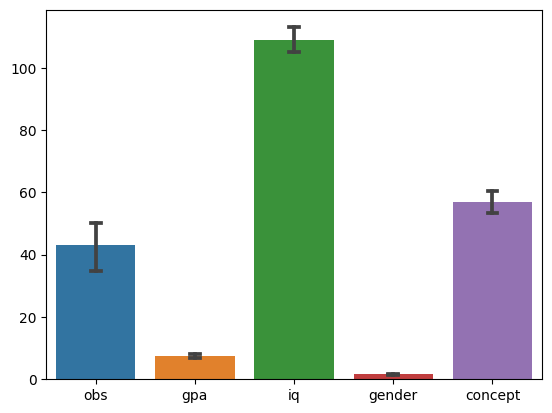

In [306]:
sns.barplot(datos, errorbar=('ci',99), capsize=0.1)